# Detection of ArUco Markers

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

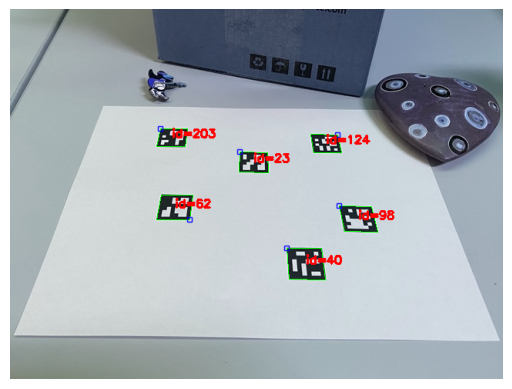

In [10]:
# Load image
image = cv.imread("../Images/markers.jpg")

# Create ArUco detector 
dictionary = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_6X6_250)
parameters =  cv.aruco.DetectorParameters()
detector = cv.aruco.ArucoDetector(dictionary, parameters)

# Detect markers
markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(image)

# Draw markers
cv.aruco.drawDetectedMarkers(image, markerCorners, markerIds)

plt.axis("off")
plt.imshow(image)
plt.show()